# Data Visualization using Matplotlib and Seaborn
Visualization libraries in python include matplotlib, vispy, seaborn, pygot, folium, networkx
Matplotlib is most common library built using numpy and scipy. It has full control over graph and plotting styles. Matplotlib has plotting integrations with pandas. So a lot of matplotlib plots can be directly created with pandas itself.

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [266]:
#%matplotlib inline is to display the plot within the jupyter notebook

In [267]:
print(plt.style.available)

['fivethirtyeight', '_classic_test', 'fast', 'bmh', 'tableau-colorblind10', 'seaborn-muted', 'seaborn-ticks', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-whitegrid', 'dark_background', 'seaborn-darkgrid', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'grayscale', 'seaborn-pastel', 'seaborn-white', 'seaborn-deep', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-poster', 'seaborn-bright', 'seaborn', 'classic']


In [268]:
plt.style.use("seaborn-white")

In [269]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")

In [270]:
titanic_train[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [271]:
titanic_test[:1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [272]:
titanic_train.columns.isin(titanic_test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Just by browsing the datasets, I understand that we have to train the model using the training dataset to predict the values of Survived. And predict the values of survived on the test dataset.

In [273]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          329
Embarked         0
dtype: int64

In [274]:
titanic_test["Survived"] = -100

In [275]:
titanic_test.columns.isin(titanic_train.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [276]:
#now that they have the same columns we can concatenate the 2 datasets row-wise for cleaning purpose, 
#and then we'll seperate them out again, when we want to train the model on the training data. Since the model
#has to be trained on the training data only, so we'll seperate out at that time. 

In [277]:
titanic=titanic_train.append(titanic_test)

In [278]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [279]:
titanic.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,-100,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,-100,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,-100,2668
418,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,1310,3,male,0,-100,330911
419,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,1311,3,female,1,-100,363272


In [280]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1048 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1310 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [281]:
titanic["Title"] = titanic["Name"].str.split().str.get(1).str.capitalize()

In [282]:
titanic["Deck"]=titanic.Cabin.str[0]

In [283]:
titanic["FamilySize"] = titanic.Parch + titanic.SibSp + 1

In [284]:
tit = titanic.copy()

In [285]:
titanic = tit.copy()

In [286]:
titanic.drop(["Cabin", "Name", "Ticket", "Parch","SibSp"], axis = 1, inplace = True)

In [287]:

plt.style.use("dark_background")

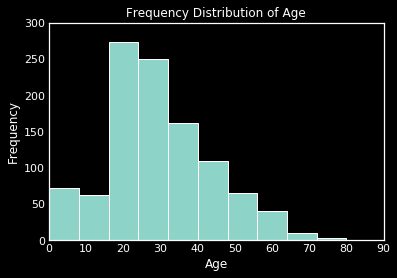

In [288]:
#2 ways to change the figure size
#1st way
plt.figure(figsize=(10,4))

#2nd way
fig = plt.gcf() #get current figure
fig.set_size_inches(6, 4)

plt.hist(titanic.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Age")
plt.xlim(0,90)
plt.ylim(0,300)
plt.axis([0,90, 0,300]) #we can change the xlim and y lim together using the plt.axis
plt.show() #suppress the text and show only the visualization

In [289]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

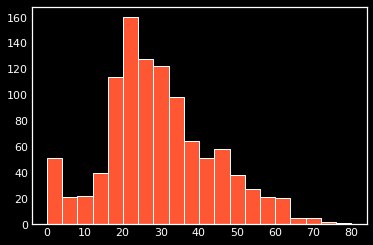

In [290]:
plt.hist(titanic.Age, bins = 20, color = "#FF5733")
plt.show()

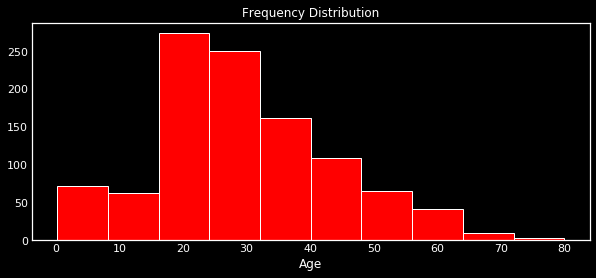

In [291]:
titanic.hist(column="Age", figsize=(10,4), grid = False, bins = 10, color = "red", edgecolor = "white")
plt.xlabel("Age")
plt.title("Frequency Distribution")
plt.show()

# Class 10

### KDE Plot for univariate visualization of continuous variables

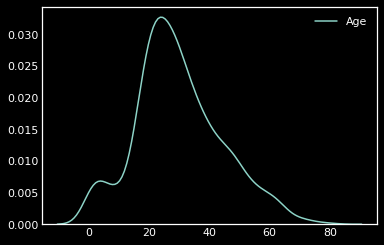

In [292]:
sns.kdeplot(titanic.Age, )

#### Univariate Visualizations for continuous variables using boxplots

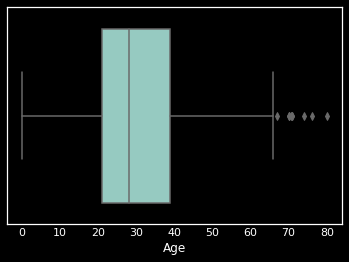

In [293]:
sns.boxplot(titanic.Age)

- bottom outliers : values smaller than Q1 - 1.5IQR 
- top outliers: values greater than Q3 + 1.5IQR

In [294]:
titanic["Age"].quantile(.25)

21.0

In [295]:
titanic["Age"].quantile(.75)

39.0

In [296]:
IQR = titanic["Age"].quantile(.75) - titanic.Age.quantile(.25)
IQR

18.0

In [297]:
top_th = titanic.Age.quantile(.75) + 1.5*IQR

In [298]:
titanic.loc[titanic.Age>top_th, "Age"] = top_th

In [299]:
(titanic.Age>top_th).any()

False

In [300]:
#to impute the missing values
titanic.loc[titanic["Age"].isnull(), "Age"] = titanic.Age.mean()

In [301]:
titanic.Age.isnull().any()

False

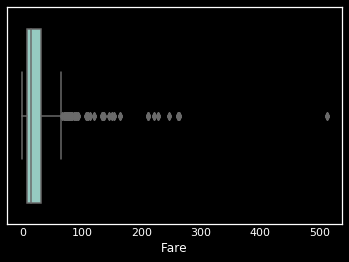

In [302]:
sns.boxplot(titanic.Fare) #top outliers here

### Univariate Visualization for factor variables: Barplot and PieCharts

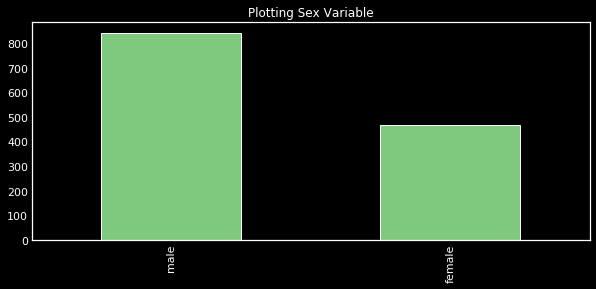

In [303]:
table = titanic.Sex.value_counts().plot(kind = "bar", style = "ggplot", colormap = "Accent", 
                                        figsize = (10,4), title = "Plotting Sex Variable", )
table

- In seaborn we have got style options: darkgrid, whitegrid, dark, white and ticks
- 6 variations of default palette: muted, pastel, bright, dark, deep and colorblind

In [304]:
sns.set(style = "whitegrid", palette="muted", font = "sans-serif", font_scale = 2)

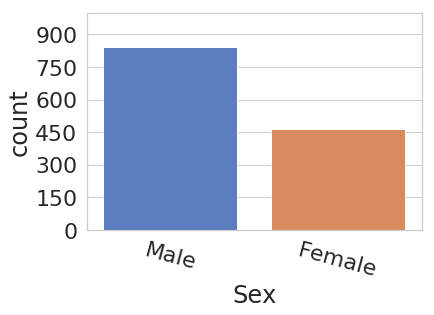

In [305]:
sns.countplot(x = titanic["Sex"], palette= "muted")
plt.xticks(ticks=np.arange(2), labels = ['Male', "Female"], rotation = -15)
plt.yticks(np.arange(0, 1000, 150))
plt.ylim(0,1000)
plt.show()

#### Pie Chart

In [306]:
table = titanic.Sex.value_counts()
table

male      844
female    467
Name: Sex, dtype: int64

In [307]:
table.index

Index(['male', 'female'], dtype='object')

In [308]:
sns.set(style = "whitegrid", palette="muted", font = "sans-serif", font_scale = 1)

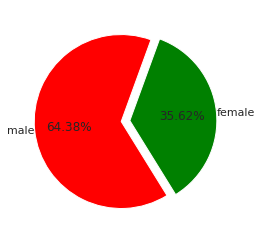

In [309]:
plt.pie(x = table, explode = (.05, .05), labels = table.index, startangle = 70, colors=["red", "green"], 
        labeldistance=1, rotatelabels=False,autopct="%1.2f%%")
plt.show()

----

#### Bivariate Visualization between 2 continuous variables

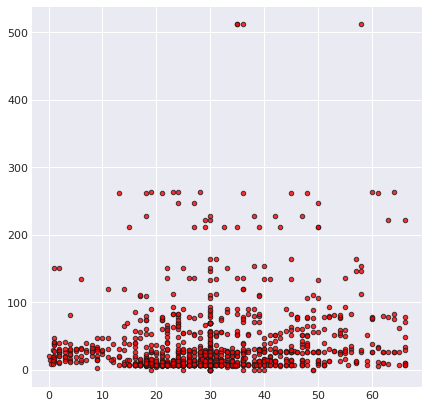

In [310]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize = (7,7))
plt.scatter(x= titanic.Age, y = titanic.Fare, c = "Red",  s= 20, edgecolors='k', alpha = .8)
#alpha is the transparency level

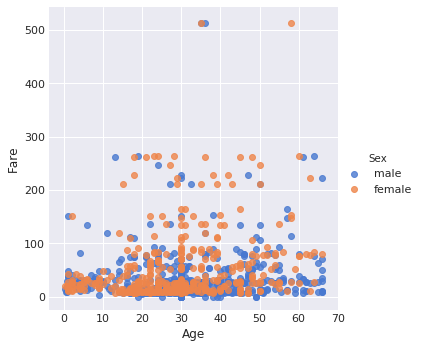

In [311]:
sns.lmplot(x = "Age", y = "Fare", data = titanic, fit_reg = False, hue = "Sex")
plt.show()

<Figure size 1440x360 with 0 Axes>

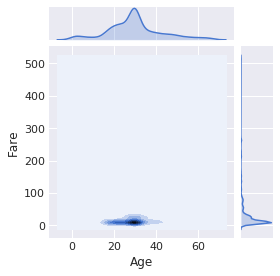

In [312]:
plt.figure(figsize=(20,5))
sns.jointplot(x = "Age", y = "Fare", data = titanic, kind = "kde", height = 4)

The density is pretty high for Age of 25 years and fare of Rs. 10

In [313]:
bosdf = pd.read_csv("boston.csv")

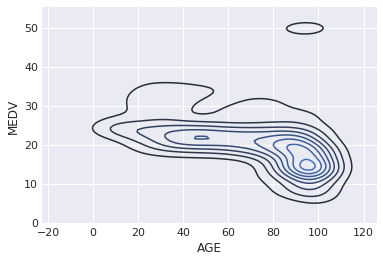

In [314]:
sns.kdeplot(bosdf.AGE, bosdf.MEDV)

In [315]:
#max density at age = 95 and medv = rs. 14

<Figure size 432x432 with 0 Axes>

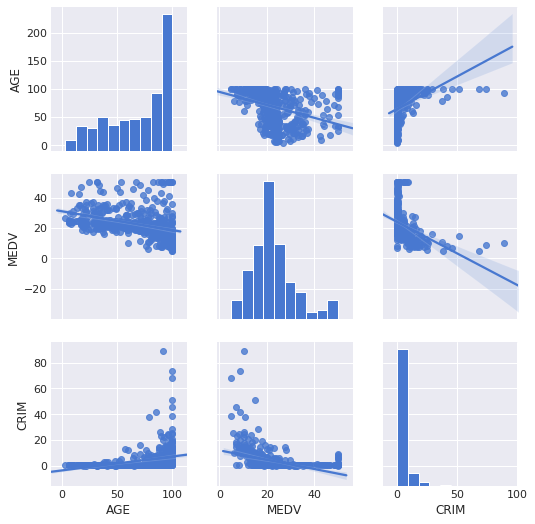

In [319]:
plt.figure(figsize=(6,6))
sns.pairplot(data = bosdf[["AGE", "MEDV", "CRIM"]], kind  = "reg")

In [144]:
pd.set_option('display.precision', 1)
pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [147]:
corr = bosdf.corr()

In [154]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

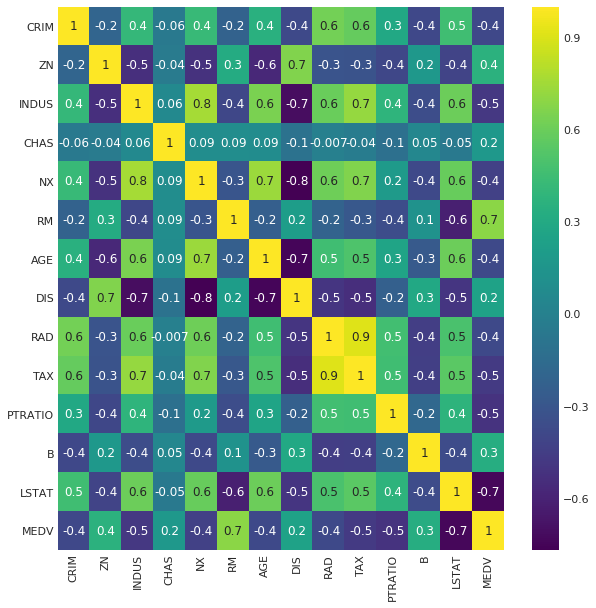

In [156]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, fmt = '.1g', cmap = "viridis")

### Factor + continuous variables

In [158]:
titanic[titanic.Survived!=-100].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

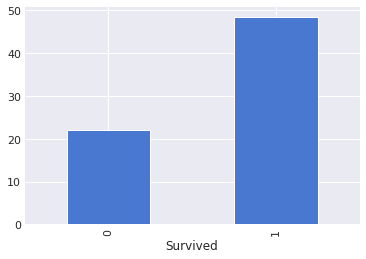

In [161]:
titanic[titanic.Survived!=-100].groupby("Survived")["Fare"].mean().plot(kind = "bar")

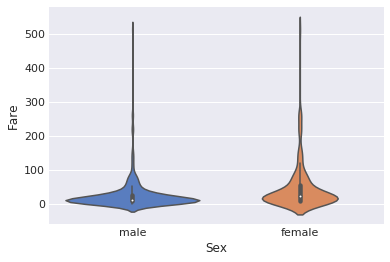

In [167]:
sns.violinplot(x = "Sex", y = "Fare", data = titanic)

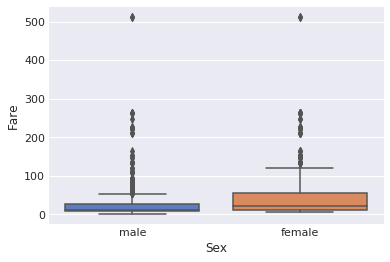

In [189]:
sns.boxplot(x = "Sex", y = "Fare", data = titanic)

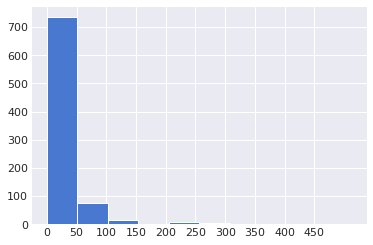

In [192]:
plt.hist(x = titanic[titanic.Sex =="male"].Fare)
plt.xticks(np.arange(0,500,50))
plt.show()

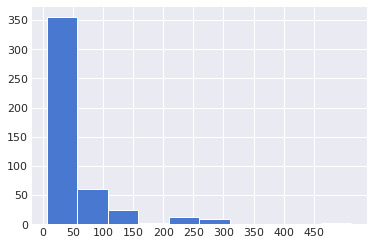

In [193]:
plt.hist(x = titanic[titanic.Sex =="female"].Fare)
plt.xticks(np.arange(0,500,50))
plt.show()

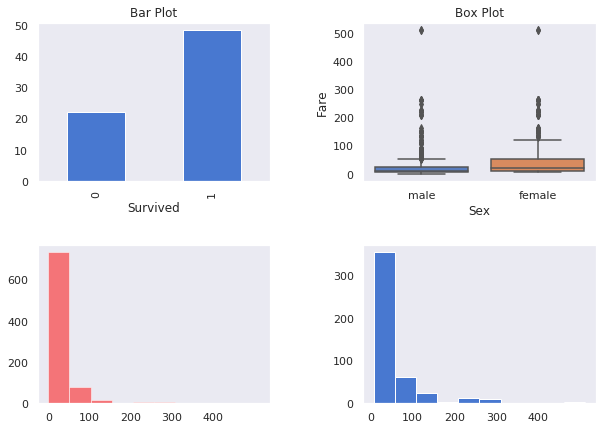

In [213]:
plt.figure(figsize=(10,7))
sns.set(style = "dark", palette="muted", font = "sans-serif", font_scale = 1)
plt.subplots_adjust(hspace = .4, wspace = .4)
plt.subplot(221) #divide the plotting region into 2 rows and 2 columns and create the first subplot
titanic[titanic.Survived!=-100].groupby("Survived")["Fare"].mean().plot(kind = "bar")
plt.title("Bar Plot")

plt.subplot(2,2,2) #divide the plotting region into 2 rows and 2 columns and create 2nd subplot
sns.boxplot(x = "Sex", y = "Fare", data = titanic)
plt.title("Box Plot")

plt.subplot(223) #2 rows and 2cols and 3rd subplot
plt.hist(x = titanic[titanic.Sex =="male"].Fare, color = "red" , alpha = .5)
plt.xticks(np.arange(0,500,100))

plt.subplot(2,2,4)#4th subplot
plt.hist(x = titanic[titanic.Sex =="female"].Fare)
plt.xticks(np.arange(0,500,100))
plt.show()

In [215]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [217]:
print(plt.style.available)

['fivethirtyeight', '_classic_test', 'fast', 'bmh', 'tableau-colorblind10', 'seaborn-muted', 'seaborn-ticks', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-whitegrid', 'dark_background', 'seaborn-darkgrid', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'grayscale', 'seaborn-pastel', 'seaborn-white', 'seaborn-deep', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-poster', 'seaborn-bright', 'seaborn', 'classic']


In [218]:
?sns.set

Signature:
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aesthetic parameters in one step.

Each set of parameters can be set directly or temporarily, see the
referenced functions below for more information.

Parameters
----------
context : string or dict
    Plotting context parameters, see :func:`plotting_context`
style : string or dict
    Axes style parameters, see :func:`axes_style`
palette : string or sequence
    Color palette, see :func:`color_palette`
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
color_codes : bool
    If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
    color codes (e.g. "b", "g", "r", etc.) to the colors from this palette.
rc : dict or None
    Dictionary of rc parameter mappings to override

<Figure size 432x288 with 0 Axes>

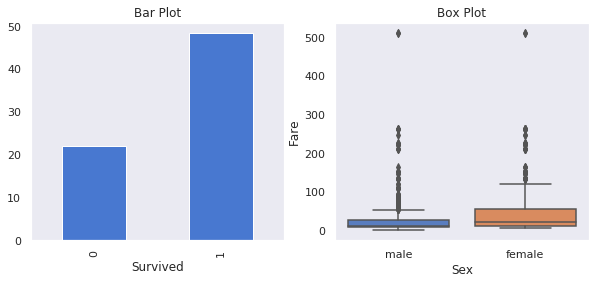

In [229]:
sns.set(style = "dark", palette="muted", font = "sans-serif", font_scale = 1)
plt.subplots_adjust(hspace = .4, wspace = .4)
f,ax = plt.subplots(1,2, figsize = (10,4)) #divide the plotting region into 2 rows and 2 columns and create the first subplot
titanic[titanic.Survived!=-100].groupby("Survived")["Fare"].mean().plot(kind = "bar", ax = ax[0])
ax[0].set_title("Bar Plot")

sns.boxplot(x = "Sex", y = "Fare", data = titanic, ax = ax[1])
ax[1].set_title("Box Plot")
plt.show()

### Factor + Factor plots

In [233]:
titanic[titanic.Survived!=-100].groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

sex is leading to a high variance in the survival rate, hence sex is an important feature for the prediction of the survival rate

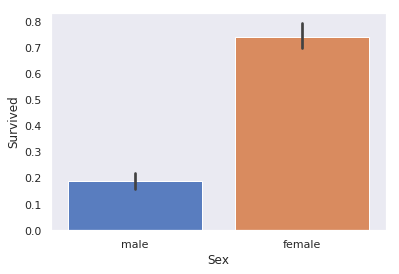

In [237]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_train)

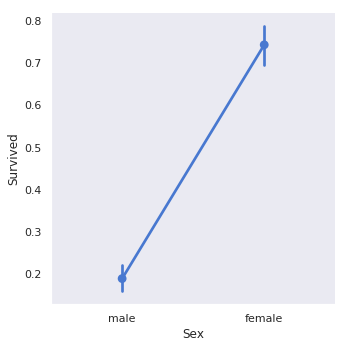

In [238]:
sns.factorplot(x = "Sex",  y = "Survived", data = titanic_train)

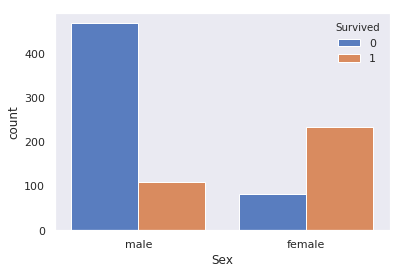

In [235]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic[titanic.Survived!=-100])

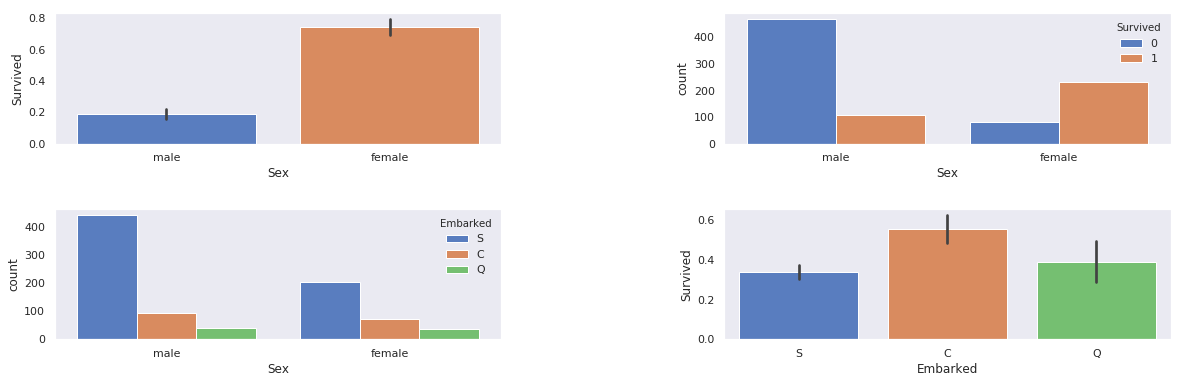

In [260]:
f,ax = plt.subplots(2,2, figsize = (20,6))
sns.barplot(x = "Sex", y = "Survived", data = titanic_train, ax = ax[0, 0])
sns.countplot(x = "Sex", hue = "Survived", data = titanic[titanic.Survived!=-100], ax = ax[0,1])
sns.countplot(x = "Sex", hue = "Embarked", data = titanic_train, ax = ax[1,0])
sns.barplot(x = "Embarked", y = "Survived", data =titanic_train, ax = ax[1,1])
plt.subplots_adjust(wspace=.5, hspace =.5)

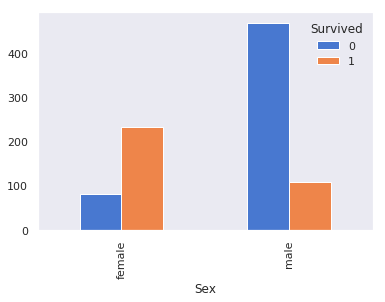

In [263]:
pd.crosstab(titanic_train.Sex, titanic_train.Survived).plot(kind = "bar", stacked = False)

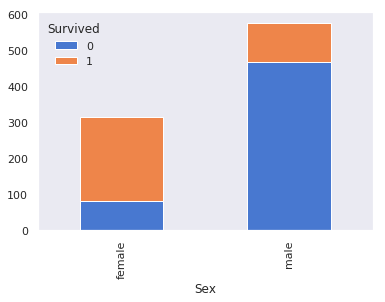

In [264]:
pd.crosstab(titanic_train.Sex, titanic_train.Survived).plot(kind = "bar", stacked = True)